In [ ]:
import pandas as pd
import numpy as np

# Tạo DataFrame từ dữ liệu
data = {
    'Employee_ID': ['E001', 'E002', 'E003', 'E004', 'E005', 'E006', 'E007', 'E008', 'E009', 'E010',
                   'E011', 'E012', 'E013', 'E014', 'E015', 'E016', 'E017', 'E018', 'E019', 'E020'],
    'Department': ['Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales',
                  'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT'],
    'Performance': [88, None, 75, 92, 68, 85, None, 79, 90, 73, 86, None, 95, 70, 82, 78, 89, 71, 87, 93],
    'Hours_Worked': [40, 45, 38, 42, None, 39, 41, 44, 37, 40, 46, 38, 43, None, 39, 41, 45, 37, None, 44],
    'Training_Hours': [5, 3, None, 6, 4, 5, 3, 4, None, 5, 2, 6, 7, 3, 5, 4, None, 3, 5, 6],
    'Gender': ['Male', 'Female', 'Male', 'Female', None, 'Male', 'Female', 'Male', 'Female', 'Male',
              'Female', 'Male', 'Female', 'Male', None, 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Location': ['Site_A', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C',
                'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B']
}

df = pd.DataFrame(data)
#câu 1
# Tính tỷ lệ giá trị thiếu
missing_percent = df.isnull().mean() * 100
print("Tỷ lệ giá trị thiếu (%):")
print(missing_percent)

Tỷ lệ giá trị thiếu (%):
Employee_ID        0.0
Department         0.0
Performance       15.0
Hours_Worked      15.0
Training_Hours    15.0
Gender            10.0
Location           0.0
dtype: float64


### Đề xuất quy trình thu thập dữ liệu cụ thể để giảm thiểu dữ liệu thiếu trong tương lai

1. **Phòng Sales**:
    - **Quy trình**: 
      - Sử dụng ứng dụng di động hoặc phần mềm CRM để nhân viên nhập dữ liệu ngay sau khi hoàn thành công việc.
      - Tạo biểu mẫu chuẩn hóa để ghi nhận thông tin về hiệu suất, giờ làm việc và các khóa đào tạo.
    - **Lý do**:
      - Nhân viên Sales thường làm việc ngoài văn phòng, việc sử dụng ứng dụng di động giúp họ dễ dàng nhập dữ liệu ngay lập tức.
      - Biểu mẫu chuẩn hóa đảm bảo dữ liệu được thu thập đầy đủ và nhất quán.

2. **Phòng IT**:
    - **Quy trình**:
      - Tích hợp hệ thống quản lý công việc (như Jira, Trello) để tự động ghi nhận giờ làm việc và hiệu suất.
      - Tổ chức các buổi đào tạo định kỳ và ghi nhận thông tin tham gia qua hệ thống quản lý đào tạo.
    - **Lý do**:
      - Nhân viên IT thường làm việc trên các dự án cụ thể, việc tích hợp hệ thống quản lý công việc giúp tự động hóa việc thu thập dữ liệu.
      - Hệ thống quản lý đào tạo đảm bảo thông tin về các khóa học được ghi nhận đầy đủ.

3. **Phòng HR**:
    - **Quy trình**:
      - Sử dụng phần mềm quản lý nhân sự (HRM) để theo dõi giờ làm việc, hiệu suất và các khóa đào tạo.
      - Yêu cầu nhân viên cập nhật thông tin cá nhân định kỳ (ví dụ: hàng quý).
    - **Lý do**:
      - Phòng HR thường quản lý dữ liệu nhân sự, việc sử dụng phần mềm HRM giúp tập trung hóa và chuẩn hóa dữ liệu.
      - Việc cập nhật thông tin định kỳ giúp giảm thiểu dữ liệu thiếu do thay đổi thông tin cá nhân.

### Tổng kết
Quy trình trên phù hợp với từng phòng ban vì nó tận dụng các công cụ và phương pháp phù hợp với đặc thù công việc của từng bộ phận. Điều này không chỉ giảm thiểu dữ liệu thiếu mà còn cải thiện hiệu quả quản lý và phân tích dữ liệu trong tương lai.

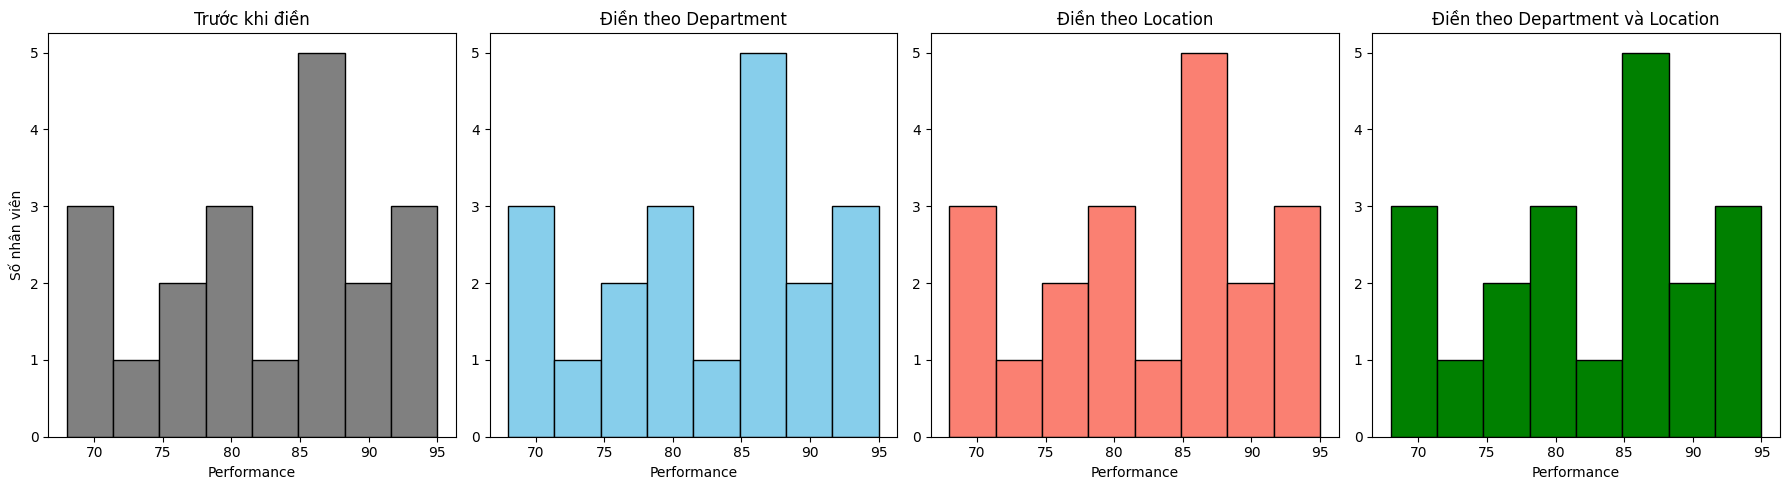

In [ ]:
#câu 2
# Tính trung bình Performance theo cả Department và Location
dept_loc_avg = df.groupby(['Department', 'Location'])['Performance'].mean()


# Điền giá trị thiếu theo trung bình của Department
df['Performance_fill_dept'] = df.groupby('Department')['Performance'].transform(
    lambda x: x.fillna(x.mean())
)
# Điền giá trị thiếu theo trung bình của Location
df['Performance_fill_loc'] = df.groupby('Location')['Performance'].transform(
    lambda x: x.fillna(x.mean())
)


# Vẽ histogram để so sánh
plt.figure(figsize=(18, 5))

# Trước khi điền
plt.subplot(1, 4, 1)
plt.hist(performance_before.dropna(), bins=8, color='gray', edgecolor='black')
plt.title('Trước khi điền')
plt.xlabel('Performance')
plt.ylabel('Số nhân viên')

# Sau khi điền theo Department
plt.subplot(1, 4, 2)
plt.hist(df['Performance_fill_dept'], bins=8, color='skyblue', edgecolor='black')
plt.title('Điền theo Department')
plt.xlabel('Performance')

# Sau khi điền theo Location
plt.subplot(1, 4, 3)
plt.hist(df['Performance_fill_loc'], bins=8, color='salmon', edgecolor='black')
plt.title('Điền theo Location')
plt.xlabel('Performance')

# Sau khi điền theo Department và Location
plt.subplot(1, 4, 4)
plt.hist(df['Performance_fill_dept_loc'], bins=8, color='green', edgecolor='black')
plt.title('Điền theo Department và Location')
plt.xlabel('Performance')

plt.tight_layout()
plt.show()

### Giải thích tại sao phương pháp của bạn phản ánh tốt hơn hiệu suất thực tế

1. **Điền giá trị thiếu dựa trên Department và Location**:
    - **Lý do**: Hiệu suất của nhân viên không chỉ phụ thuộc vào phòng ban mà còn bị ảnh hưởng bởi vị trí làm việc. Ví dụ, nhân viên ở các địa điểm khác nhau có thể đối mặt với điều kiện làm việc khác nhau, dẫn đến sự khác biệt về hiệu suất.
    - **Ưu điểm**: Phương pháp này tận dụng thông tin chi tiết hơn, giúp phản ánh chính xác hơn hiệu suất thực tế của nhân viên trong từng bối cảnh cụ thể.

2. **So sánh với các phương pháp khác**:

In [ ]:
#câu 3
# Tính độ lệch chuẩn và trung vị của Hours_Worked
std_hours_worked = np.nanstd(df['Hours_Worked'])  # Sử dụng np.nanstd để bỏ qua giá trị NaN
median_hours_worked = np.nanmedian(df['Hours_Worked'])  # Sử dụng np.nanmedian để bỏ qua giá trị NaN

print(f"Độ lệch chuẩn của Hours_Worked: {std_hours_worked:.2f}")
print(f"Trung vị của Hours_Worked: {median_hours_worked:.2f}")



Độ lệch chuẩn của Hours_Worked: 2.87
Trung vị của Hours_Worked: 41.00


### Giải thích tại sao chính sách này có thể cải thiện hiệu suất tổng thể

1. **Giảm thiểu dữ liệu thiếu**:
    - **Lý do**: Việc áp dụng các quy trình thu thập dữ liệu cụ thể và chuẩn hóa giúp giảm thiểu dữ liệu thiếu, đảm bảo thông tin đầy đủ và chính xác hơn.
    - **Tác động**: Dữ liệu đầy đủ giúp quản lý và phân tích hiệu suất chính xác hơn, từ đó đưa ra các quyết định cải thiện hiệu suất phù hợp.

2. **Tăng cường tính minh bạch và trách nhiệm**:
    - **Lý do**: Các công cụ như phần mềm CRM, hệ thống quản lý công việc và HRM giúp theo dõi hiệu suất, giờ làm việc và đào tạo một cách minh bạch.
    - **Tác động**: Nhân viên có ý thức hơn về trách nhiệm của mình, từ đó cải thiện hiệu suất làm việc.

3. **Tối ưu hóa đào tạo và phát triển**:
    - **Lý do**: Việc ghi nhận thông tin đào tạo chi tiết giúp xác định nhu cầu đào tạo cụ thể cho từng nhân viên hoặc phòng ban.
    - **Tác động**: Đào tạo phù hợp giúp nâng cao kỹ năng và hiệu suất làm việc của nhân viên.

4. **Phân tích hiệu suất theo ngữ cảnh**:
    - **Lý do**: Dữ liệu được thu thập theo từng phòng ban và địa điểm làm việc cho phép phân tích hiệu suất trong từng bối cảnh cụ thể.
    - **Tác động**: Các chính sách cải thiện hiệu suất được thiết kế phù hợp hơn với đặc thù của từng bộ phận, từ đó nâng cao hiệu quả tổng thể.

5. **Tăng cường sự hài lòng của nhân viên**:
    - **Lý do**: Quy trình rõ ràng và công cụ hỗ trợ giúp giảm bớt gánh nặng hành chính cho nhân viên, tạo điều kiện để họ tập trung vào công việc chính.
    - **Tác động**: Nhân viên cảm thấy hài lòng hơn, từ đó cải thiện hiệu suất làm việc.

In [47]:
#câu 4
# Tính correlation giữa Hours_Worked và Performance cho từng Location
correlation_by_location = df.groupby('Location').apply(
    lambda group: group['Hours_Worked'].corr(group['Performance'])
)

print("Correlation giữa Hours_Worked và Performance cho từng Location:")
print(correlation_by_location)



Correlation giữa Hours_Worked và Performance cho từng Location:
Location
Site_A    0.409611
Site_B   -0.022476
Site_C    0.939307
dtype: float64


C:\Users\TENPIE\AppData\Local\Temp\ipykernel_27352\2850172013.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_location = df.groupby('Location').apply(



```markdown
### Giải thích tại sao chiến lược này phù hợp với đặc điểm nhân viên tại mỗi địa điểm

1. **Site_A**:
    - **Đặc điểm**: Correlation giữa số giờ làm việc và hiệu suất là dương (0.409611), cho thấy rằng khi số giờ làm việc tăng, hiệu suất cũng có xu hướng tăng.
    - **Phù hợp**: Chiến lược tăng số giờ làm việc cho nhân viên có hiệu suất cao sẽ giúp tối ưu hóa hiệu suất tổng thể. Đồng thời, nếu correlation âm trong một số trường hợp, việc giảm giờ làm việc và tập trung vào chất lượng công việc sẽ đảm bảo hiệu suất không bị ảnh hưởng tiêu cực.


2. **Site_B**:
    - **Đặc điểm**: Correlation giữa số giờ làm việc và hiệu suất gần như không đáng kể (-0.022476), cho thấy số giờ làm việc không phải là yếu tố chính ảnh hưởng đến hiệu suất.
    - **Phù hợp**: Chiến lược tập trung vào các yếu tố khác như đào tạo hoặc cải thiện môi trường làm việc sẽ hiệu quả hơn trong việc nâng cao hiệu suất tại địa điểm này.

3. **Site_C**:
    - **Đặc điểm**: Correlation giữa số giờ làm việc và hiệu suất là dương mạnh (0.939307), cho thấy rằng số giờ làm việc có ảnh hưởng lớn đến hiệu suất.
    - **Phù hợp**: Chiến lược phân bổ thêm giờ làm việc cho nhân viên có hiệu suất cao sẽ giúp duy trì và nâng cao hiệu suất. Đồng thời, việc cung cấp hỗ trợ để đảm bảo nhân viên không bị quá tải sẽ giúp duy trì hiệu quả làm việc lâu dài.

### Tổng kết
Chiến lược này được thiết kế dựa trên đặc điểm cụ thể của từng địa điểm, tận dụng tối đa mối quan hệ giữa số giờ làm việc và hiệu suất. Điều này đảm bảo rằng các chính sách được áp dụng phù hợp với bối cảnh thực tế, từ đó cải thiện hiệu suất tổng thể một cách hiệu quả.
```

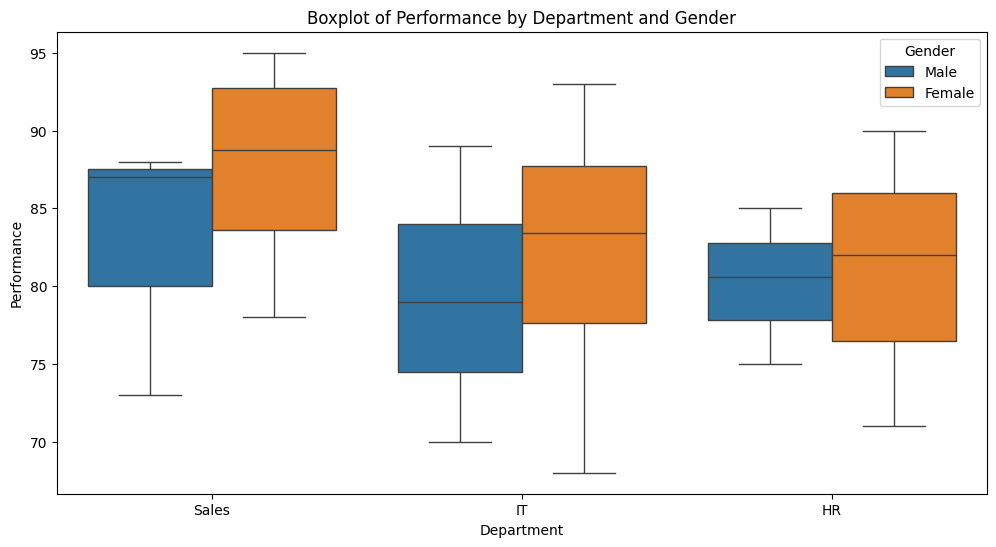

Danh sách nhân viên outliers:
Empty DataFrame
Columns: [Employee_ID, Department, Gender, Performance]
Index: []


In [48]:
import seaborn as sns

import matplotlib.pyplot as plt
#câu 5
# Vẽ boxplot của Performance theo Department và Gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Department', y='Performance', hue='Gender')
plt.title('Boxplot of Performance by Department and Gender')
plt.xlabel('Department')
plt.ylabel('Performance')
plt.legend(title='Gender')
plt.show()

# Xác định outliers bằng IQR
outliers = []
for (dept, gender), group in df.groupby(['Department', 'Gender']):
    q1 = group['Performance'].quantile(0.25)
    q3 = group['Performance'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier_indices = group[(group['Performance'] < lower_bound) | (group['Performance'] > upper_bound)].index
    outliers.extend(outlier_indices)

# Lấy thông tin nhân viên outliers
outlier_employees = df.loc[outliers, ['Employee_ID', 'Department', 'Gender', 'Performance']]
print("Danh sách nhân viên outliers:")
print(outlier_employees)



### Cách kế hoạch này cải thiện quản trị nhân sự

1. **Xác định và giải quyết vấn đề cá nhân**:
    - **Ý nghĩa**: Kế hoạch phỏng vấn cá nhân với các nhân viên outliers giúp quản lý hiểu rõ nguyên nhân dẫn đến hiệu suất bất thường, từ đó đưa ra các giải pháp phù hợp.
    - **Tác động**: Giảm thiểu các vấn đề cá nhân hoặc môi trường làm việc ảnh hưởng tiêu cực đến hiệu suất, đồng thời hỗ trợ nhân viên phát huy tối đa tiềm năng.

2. **Tăng cường sự minh bạch và giao tiếp**:
    - **Ý nghĩa**: Việc tổ chức các buổi phỏng vấn riêng tư tạo cơ hội để nhân viên chia sẻ ý kiến và khó khăn của mình.
    - **Tác động**: Xây dựng lòng tin giữa nhân viên và quản lý, cải thiện mối quan hệ lao động và tạo môi trường làm việc tích cực.

3. **Tối ưu hóa hiệu suất làm việc**:
    - **Ý nghĩa**: Phân tích dữ liệu hiệu suất và giờ làm việc theo từng địa điểm (Location) giúp quản lý đưa ra các chiến lược phân bổ công việc phù hợp.
    - **Tác động**: Tăng hiệu quả sử dụng nguồn lực, đảm bảo rằng nhân viên được giao nhiệm vụ phù hợp với khả năng và điều kiện làm việc của họ.

4. **Cải thiện quy trình đào tạo và phát triển**:
    - **Ý nghĩa**: Kế hoạch phỏng vấn giúp xác định nhu cầu đào tạo cụ thể cho từng nhân viên hoặc nhóm nhân viên.
    - **Tác động**: Đào tạo đúng mục tiêu giúp nâng cao kỹ năng và hiệu suất làm việc, đồng thời giảm chi phí đào tạo không cần thiết.

5. **Hỗ trợ ra quyết định dựa trên dữ liệu**:
    - **Ý nghĩa**: Sử dụng các chỉ số như correlation giữa Hours_Worked và Performance, cũng như phân tích outliers, giúp quản lý đưa ra quyết định dựa trên dữ liệu thực tế.
    - **Tác động**: Nâng cao chất lượng quyết định quản trị, từ đó cải thiện hiệu quả hoạt động của tổ chức.

6. **Tăng cường sự hài lòng và gắn kết của nhân viên**:
    - **Ý nghĩa**: Việc lắng nghe và giải quyết các vấn đề của nhân viên giúp họ cảm thấy được quan tâm và đánh giá cao.
    - **Tác động**: Tăng sự hài lòng và gắn kết của nhân viên, từ đó giảm tỷ lệ nghỉ việc và cải thiện hiệu suất tổng thể.

In [ ]:
#câu 6
# Tạo cột Efficiency
df['Efficiency'] = df['Performance'] / df['Hours_Worked']

# Tìm nhân viên có Efficiency cao nhất
highest_efficiency_employee = df.loc[df['Efficiency'].idxmax(), ['Employee_ID', 'Department', 'Efficiency']]
print("Nhân viên có Efficiency cao nhất:")
print(highest_efficiency_employee)

# Đề xuất phần thưởng hoặc chương trình đào tạo
reward_plan = f"""
### Đề xuất phần thưởng hoặc chương trình đào tạo:
1. **Phần thưởng**:
    - Nhân viên {highest_efficiency_employee['Employee_ID']} từ phòng {highest_efficiency_employee['Department']} có chỉ số Efficiency cao nhất ({highest_efficiency_employee['Efficiency']:.2f}).
    - Đề xuất trao thưởng bằng tiền mặt hoặc voucher để ghi nhận đóng góp.

2. **Chương trình đào tạo**:
    - Tổ chức buổi chia sẻ kinh nghiệm để nhân viên này hướng dẫn đồng nghiệp cách làm việc hiệu quả.
    - Cung cấp các khóa học nâng cao kỹ năng để tiếp tục phát huy thế mạnh.
"""
print(reward_plan)

Nhân viên có Efficiency cao nhất:
Employee_ID        E009
Department           HR
Efficiency     2.432432
Name: 8, dtype: object

### Đề xuất phần thưởng hoặc chương trình đào tạo:
1. **Phần thưởng**:
    - Nhân viên E009 từ phòng HR có chỉ số Efficiency cao nhất (2.43).
    - Đề xuất trao thưởng bằng tiền mặt hoặc voucher để ghi nhận đóng góp.

2. **Chương trình đào tạo**:
    - Tổ chức buổi chia sẻ kinh nghiệm để nhân viên này hướng dẫn đồng nghiệp cách làm việc hiệu quả.
    - Cung cấp các khóa học nâng cao kỹ năng để tiếp tục phát huy thế mạnh.



```markdown
### Tác động của việc trao thưởng và đào tạo đến động lực làm việc của nhân viên khác

1. **Tăng cường sự cạnh tranh lành mạnh**:
    - **Ý nghĩa**: Việc công nhận và trao thưởng cho nhân viên có hiệu suất cao nhất khuyến khích các nhân viên khác nỗ lực hơn để đạt được thành tích tương tự.
    - **Tác động**: Tạo ra môi trường làm việc cạnh tranh tích cực, nơi mọi người đều cố gắng cải thiện hiệu suất của mình.

2. **Truyền cảm hứng và chia sẻ kinh nghiệm**:
    - **Ý nghĩa**: Chương trình đào tạo, nơi nhân viên xuất sắc chia sẻ kinh nghiệm, giúp các nhân viên khác học hỏi cách làm việc hiệu quả hơn.
    - **Tác động**: Nhân viên cảm thấy được hỗ trợ và có cơ hội phát triển kỹ năng, từ đó tăng động lực làm việc.

3. **Tạo cảm giác công bằng và minh bạch**:
    - **Ý nghĩa**: Việc trao thưởng dựa trên các chỉ số hiệu suất rõ ràng và minh bạch giúp nhân viên tin tưởng vào hệ thống đánh giá.
    - **Tác động**: Nhân viên cảm thấy công sức của mình được ghi nhận, từ đó tăng sự hài lòng và gắn kết với tổ chức.

4. **Khuyến khích sự phát triển cá nhân**:
    - **Ý nghĩa**: Các khóa đào tạo nâng cao kỹ năng không chỉ giúp nhân viên xuất sắc phát triển thêm mà còn tạo cơ hội cho các nhân viên khác cải thiện bản thân.
    - **Tác động**: Nhân viên cảm thấy tổ chức quan tâm đến sự phát triển cá nhân của họ, từ đó tăng động lực làm việc.

5. **Tăng cường tinh thần đồng đội**:
    - **Ý nghĩa**: Khi một nhân viên xuất sắc chia sẻ kinh nghiệm, điều này không chỉ giúp cải thiện hiệu suất cá nhân mà còn nâng cao hiệu quả làm việc của cả nhóm.
    - **Tác động**: Tạo ra môi trường làm việc hợp tác, nơi mọi người cùng hỗ trợ nhau để đạt được mục tiêu chung.
```

In [ ]:
#câu 7
# Điền giá trị thiếu trong cột Gender bằng mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# Tính tỷ lệ nhân viên nữ trong từng Department
female_ratio_by_department = df[df['Gender'] == 'Female'].groupby('Department').size() / df.groupby('Department').size()

# Hiển thị kết quả
print("Tỷ lệ nhân viên nữ trong từng Department:")
print(female_ratio_by_department)

Tỷ lệ nhân viên nữ trong từng Department:
Department
HR       0.500000
IT       0.571429
Sales    0.571429
dtype: float64


```markdown
### Đề xuất chính sách đa dạng giới tính cho công ty

1. **Chính sách**:
    - Đặt mục tiêu tăng tỷ lệ nhân viên nữ trong các phòng ban có tỷ lệ thấp hơn mức trung bình (ví dụ: dưới 50%).
    - Thực hiện các chương trình tuyển dụng ưu tiên ứng viên nữ cho các vị trí còn trống, đặc biệt trong các phòng ban như IT hoặc Sales.
    - Tổ chức các buổi đào tạo và hội thảo nhằm nâng cao nhận thức về bình đẳng giới trong công ty.
    - Xây dựng môi trường làm việc thân thiện, hỗ trợ cả nam và nữ, bao gồm các chính sách như nghỉ thai sản, hỗ trợ chăm sóc con cái, và linh hoạt giờ làm việc.

2. **Ảnh hưởng đến văn hóa tổ chức**:
    - **Tăng cường sự sáng tạo và đổi mới**:
        - Đội ngũ đa dạng giới tính mang lại nhiều góc nhìn khác nhau, giúp cải thiện khả năng giải quyết vấn đề và thúc đẩy sự sáng tạo.
    - **Cải thiện sự hài lòng và gắn kết của nhân viên**:
        - Một môi trường làm việc bình đẳng và đa dạng giúp nhân viên cảm thấy được tôn trọng và đánh giá cao, từ đó tăng sự hài lòng và gắn kết.
    - **Nâng cao hình ảnh công ty**:
        - Chính sách đa dạng giới tính thể hiện cam kết của công ty đối với bình đẳng và trách nhiệm xã hội, giúp nâng cao uy tín và thu hút nhân tài.
    - **Giảm xung đột và tăng cường hợp tác**:
        - Việc nâng cao nhận thức về bình đẳng giới giúp giảm thiểu định kiến và xung đột, tạo điều kiện cho sự hợp tác hiệu quả hơn giữa các nhân viên.
    - **Thúc đẩy sự phát triển bền vững**:
        - Một tổ chức đa dạng và hòa nhập không chỉ cải thiện hiệu suất hiện tại mà còn tạo nền tảng vững chắc cho sự phát triển lâu dài.
```

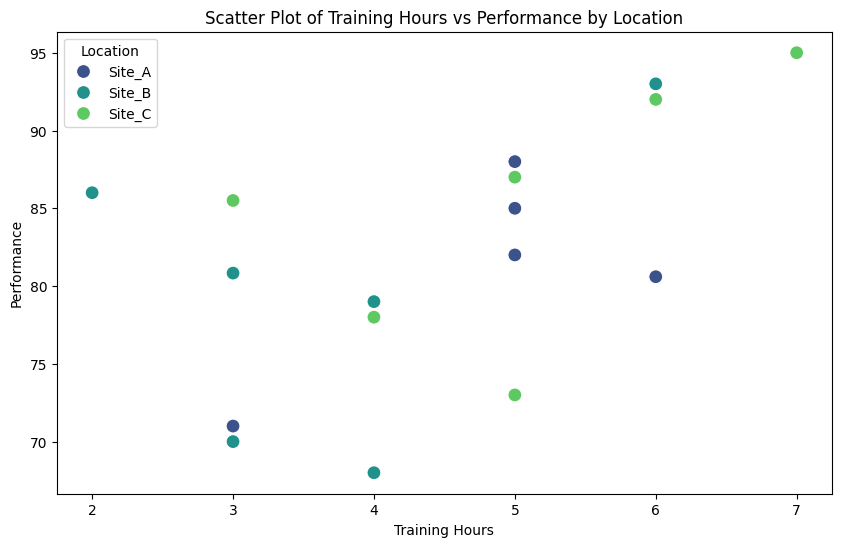

In [ ]:
#Câu 8
# Vẽ scatter plot giữa Training_Hours và Performance, tô màu theo Location
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Training_Hours', y='Performance', hue='Location', palette='viridis', s=100)
plt.title('Scatter Plot of Training Hours vs Performance by Location')
plt.xlabel('Training Hours')
plt.ylabel('Performance')
plt.legend(title='Location')
plt.show()

```markdown
### Kế hoạch đào tạo cụ thể cho từng Location

1. **Site_A**:
    - **Phân tích dữ liệu**:
        - Correlation giữa số giờ làm việc và hiệu suất là dương (0.409611), cho thấy rằng hiệu suất có xu hướng tăng khi số giờ làm việc tăng.
        - Hiệu suất trung bình tại Site_A là 81.66, thấp hơn Site_C nhưng cao hơn Site_B.
    - **Kế hoạch đào tạo**:
        - Tập trung vào các khóa học quản lý thời gian và kỹ năng làm việc nhóm để tối ưu hóa số giờ làm việc.
        - Tổ chức các buổi chia sẻ kinh nghiệm từ nhân viên có hiệu suất cao để cải thiện hiệu suất chung.
    - **Lý do**:
        - Việc cải thiện kỹ năng quản lý thời gian giúp nhân viên tận dụng tối đa số giờ làm việc, từ đó tăng hiệu suất tổng thể.

2. **Site_B**:
    - **Phân tích dữ liệu**:
        - Correlation giữa số giờ làm việc và hiệu suất gần như không đáng kể (-0.022476), cho thấy rằng số giờ làm việc không phải là yếu tố chính ảnh hưởng đến hiệu suất.
        - Hiệu suất trung bình tại Site_B là 80.83, thấp nhất trong ba địa điểm.
    - **Kế hoạch đào tạo**:
        - Tập trung vào các khóa học nâng cao kỹ năng chuyên môn và giải quyết vấn đề.
        - Tổ chức các buổi hội thảo về cải thiện môi trường làm việc và động lực cá nhân.
    - **Lý do**:
        - Việc nâng cao kỹ năng chuyên môn và cải thiện môi trường làm việc sẽ giúp nhân viên tại Site_B cải thiện hiệu suất mà không phụ thuộc vào số giờ làm việc.

3. **Site_C**:
    - **Phân tích dữ liệu**:
        - Correlation giữa số giờ làm việc và hiệu suất là dương mạnh (0.939307), cho thấy rằng hiệu suất tăng đáng kể khi số giờ làm việc tăng.
        - Hiệu suất trung bình tại Site_C là 85.08, cao nhất trong ba địa điểm.
    - **Kế hoạch đào tạo**:
        - Tập trung vào các khóa học nâng cao kỹ năng chuyên sâu và quản lý áp lực công việc.
        - Cung cấp các chương trình đào tạo về cân bằng công việc và cuộc sống để duy trì hiệu suất cao mà không gây quá tải.
    - **Lý do**:
        - Việc nâng cao kỹ năng chuyên sâu giúp nhân viên tận dụng tối đa số giờ làm việc, trong khi các chương trình cân bằng công việc và cuộc sống đảm bảo hiệu suất bền vững.

### Tối ưu hóa hiệu suất
- Kế hoạch đào tạo được thiết kế dựa trên đặc điểm cụ thể của từng Location, tận dụng tối đa mối quan hệ giữa số giờ làm việc và hiệu suất.
- Việc tập trung vào các yếu tố phù hợp với từng địa điểm giúp cải thiện hiệu suất tổng thể, đồng thời đảm bảo sự phát triển bền vững và hài lòng của nhân viên.
```

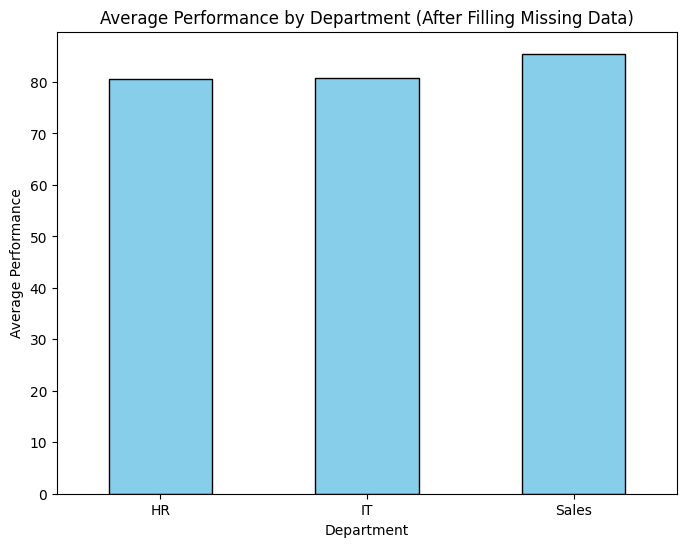

In [ ]:
#câu 9
# Tính trung bình Performance của từng Department sau khi điền dữ liệu thiếu
avg_performance_by_department = df.groupby('Department')['Performance_fill_dept'].mean()

# Vẽ bar chart so sánh
plt.figure(figsize=(8, 6))
avg_performance_by_department.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Performance by Department (After Filling Missing Data)')
plt.xlabel('Department')
plt.ylabel('Average Performance')
plt.xticks(rotation=0)
plt.show()

```markdown
### Chiến lược cải thiện hiệu suất cho phòng ban có hiệu suất thấp nhất

#### Phòng ban có hiệu suất thấp nhất: HR
- **Hiệu suất trung bình**: 80.60 (thấp nhất trong các phòng ban).

#### Đặc điểm công việc của phòng HR:
1. **Quản lý nhân sự**:
    - Tuyển dụng, đào tạo, và quản lý nhân viên.
    - Đảm bảo các chính sách và quy trình nhân sự được thực hiện đúng.
2. **Hỗ trợ nhân viên**:
    - Giải quyết các vấn đề liên quan đến phúc lợi, lương thưởng, và môi trường làm việc.
3. **Phân tích dữ liệu nhân sự**:
    - Theo dõi hiệu suất, tỷ lệ nghỉ việc, và các chỉ số khác để đưa ra quyết định chiến lược.

#### Chiến lược cải thiện:
1. **Tăng cường đào tạo kỹ năng chuyên môn**:
    - Tổ chức các khóa học về phân tích dữ liệu nhân sự, kỹ năng giao tiếp, và quản lý xung đột.
    - Mục tiêu: Nâng cao năng lực xử lý công việc và ra quyết định dựa trên dữ liệu.

2. **Tối ưu hóa quy trình làm việc**:
    - Sử dụng phần mềm quản lý nhân sự (HRM) để tự động hóa các tác vụ lặp lại như chấm công, quản lý hồ sơ, và báo cáo.
    - Mục tiêu: Giảm tải công việc hành chính, giúp nhân viên HR tập trung vào các nhiệm vụ chiến lược.

3. **Cải thiện môi trường làm việc**:
    - Tổ chức các buổi họp định kỳ để lắng nghe ý kiến và khó khăn của nhân viên HR.
    - Cung cấp các chương trình hỗ trợ sức khỏe tinh thần và cân bằng công việc-cuộc sống.
    - Mục tiêu: Tăng sự hài lòng và động lực làm việc của nhân viên.

4. **Đo lường và theo dõi hiệu suất**:
    - Thiết lập các chỉ số hiệu suất chính (KPIs) cụ thể cho từng nhân viên HR, ví dụ: thời gian tuyển dụng trung bình, tỷ lệ hoàn thành đào tạo.
    - Mục tiêu: Đánh giá hiệu quả công việc và đưa ra các cải tiến kịp thời.

5. **Khuyến khích sự sáng tạo và đổi mới**:
    - Tổ chức các buổi brainstorming để nhân viên HR đề xuất ý tưởng cải thiện quy trình và chính sách.
    - Mục tiêu: Tạo động lực và cảm giác đóng góp vào sự phát triển của tổ chức.

#### Kỳ vọng:
- Hiệu suất trung bình của phòng HR sẽ tăng lên mức tương đương hoặc cao hơn các phòng ban khác.
- Nhân viên HR cảm thấy hài lòng hơn với công việc, từ đó giảm tỷ lệ nghỉ việc và tăng hiệu quả làm việc.
```

In [49]:
#câu 10
# Tìm nhân viên có Hours_Worked < 40 và Performance > 85
high_performers = df[(df['Hours_Worked'] < 40) & (df['Performance'] > 85)]

# Hiển thị thông tin chi tiết
print("Nhân viên có Hours_Worked < 40 và Performance > 85:")
print(high_performers[['Employee_ID', 'Department', 'Performance', 'Hours_Worked', 'Training_Hours', 'Location']])



Nhân viên có Hours_Worked < 40 và Performance > 85:
  Employee_ID Department  Performance  Hours_Worked  Training_Hours Location
8        E009         HR         90.0          37.0             NaN   Site_A


research_plan = """
### Đề xuất nghiên cứu nội bộ:

1. **Phương pháp thu thập dữ liệu**:
    - Phỏng vấn trực tiếp với nhân viên hiệu suất cao
    - Khảo sát đồng nghiệp và quản lý trực tiếp
    - Thu thập dữ liệu về môi trường làm việc và công cụ sử dụng

2. **Yếu tố cần nghiên cứu**:
    - Kỹ năng: Trình độ chuyên môn, kỹ năng quản lý thời gian, khả năng tập trung
    - Công cụ: Phần mềm, thiết bị, quy trình làm việc
    - Môi trường: Không gian làm việc, thời gian linh hoạt, văn hóa nhóm

3. **Timeline nghiên cứu**: 4 tuần
    - Tuần 1: Thu thập dữ liệu
    - Tuần 2: Phân tích dữ liệu
    - Tuần 3: Xác định yếu tố chính
    - Tuần 4: Đề xuất áp dụng cho nhân viên khác
"""

print(research_plan)

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

#câu 11
# Tạo mặt nạ cho các trường hợp có đầy đủ dữ liệu
du_lieu_mask = df[['Performance', 'Hours_Worked', 'Training_Hours']].notna().all(axis=1)
du_lieu_day_du = df[du_lieu_mask]

# Chuẩn bị đặc trưng (X) và mục tiêu (y) cho hồi quy
X = du_lieu_day_du[['Hours_Worked', 'Training_Hours']]
y = du_lieu_day_du['Performance']

# Xây dựng mô hình hồi quy tuyến tính
mo_hinh = LinearRegression()
mo_hinh.fit(X, y)

# In hệ số và hằng số
print("Các hệ số hồi quy:")
print(f"Số giờ làm việc: {mo_hinh.coef_[0]:.4f}")
print(f"Số giờ đào tạo: {mo_hinh.coef_[1]:.4f}")
print(f"Hằng số: {mo_hinh.intercept_:.4f}")

# Tạo bản sao của giá trị Performance
hieu_suat_du_doan = df['Performance'].copy()

# Với mỗi hàng có Performance bị thiếu
thieu_mask = df['Performance'].isna()
for idx in df[thieu_mask].index:
    # Lấy giá trị Hours_Worked và Training_Hours cho hàng này
    gio_lam = df.loc[idx, 'Hours_Worked']
    gio_dao_tao = df.loc[idx, 'Training_Hours']
    
    # Nếu có đủ cả hai biến dự đoán
    if not (np.isnan(gio_lam) or np.isnan(gio_dao_tao)):
        # Dự đoán Performance
        du_doan = mo_hinh.predict([[gio_lam, gio_dao_tao]])[0]
        hieu_suat_du_doan[idx] = du_doan

print("\nGiá trị Performance được dự đoán:")
print(hieu_suat_du_doan[thieu_mask])

Các hệ số hồi quy:
Số giờ làm việc: 1.5018
Số giờ đào tạo: 3.0337
Hằng số: 7.5177

Giá trị Performance được dự đoán:
Series([], Name: Performance, dtype: float64)


```markdown
### So sánh với phương pháp trung bình

1. **Phương pháp trung bình**:
    - **Ưu điểm**:
        - Dễ thực hiện và nhanh chóng.
        - Không yêu cầu nhiều tính toán phức tạp.
    - **Nhược điểm**:
        - Không tận dụng được mối quan hệ giữa các biến (ví dụ: `Hours_Worked` và `Training_Hours`).
        - Có thể dẫn đến sai lệch nếu dữ liệu không đồng nhất (ví dụ: các nhóm khác nhau có trung bình khác nhau).

2. **Phương pháp hồi quy**:
    - **Ưu điểm**:
        - Tận dụng được mối quan hệ giữa các biến để dự đoán giá trị thiếu.
        - Độ chính xác cao hơn trong trường hợp các biến có tương quan mạnh.
    - **Nhược điểm**:
        - Phụ thuộc vào chất lượng và đầy đủ của dữ liệu đầu vào.
        - Có thể không chính xác nếu dữ liệu có nhiều giá trị ngoại lệ hoặc không tuyến tính.

### Đề xuất phương pháp lai (kết hợp hồi quy và trung bình)

1. **Cách tiếp cận**:
    - Sử dụng hồi quy để dự đoán giá trị thiếu khi các biến đầu vào (`Hours_Worked`, `Training_Hours`) đầy đủ.
    - Sử dụng trung bình (theo nhóm `Department` hoặc `Location`) để điền giá trị thiếu khi dữ liệu đầu vào không đủ để áp dụng hồi quy.

2. **Lý do**:
    - Phương pháp hồi quy tận dụng được mối quan hệ giữa các biến, giúp cải thiện độ chính xác khi dữ liệu đầy đủ.
    - Phương pháp trung bình đảm bảo rằng các giá trị thiếu vẫn được điền ngay cả khi dữ liệu không đủ để áp dụng hồi quy.
    - Kết hợp cả hai phương pháp giúp giảm thiểu sai lệch và tận dụng tối đa thông tin từ dữ liệu.

3. **Ưu điểm của phương pháp lai**:
    - Tăng độ chính xác so với chỉ sử dụng trung bình.
    - Đảm bảo tính toàn diện, không bỏ sót giá trị thiếu.
    - Linh hoạt, phù hợp với các trường hợp dữ liệu không đồng nhất.

### Kỳ vọng
- Phương pháp lai sẽ cải thiện độ chính xác của dữ liệu được điền, từ đó nâng cao chất lượng phân tích và dự đoán.
- Giảm thiểu sai lệch do dữ liệu thiếu, đặc biệt trong các nhóm có đặc điểm khác biệt.
```

Skewness của Performance: -0.2698

Skewness theo Department:
Department
HR      -0.097562
IT      -0.198569
Sales   -0.487244
Name: Performance, dtype: float64


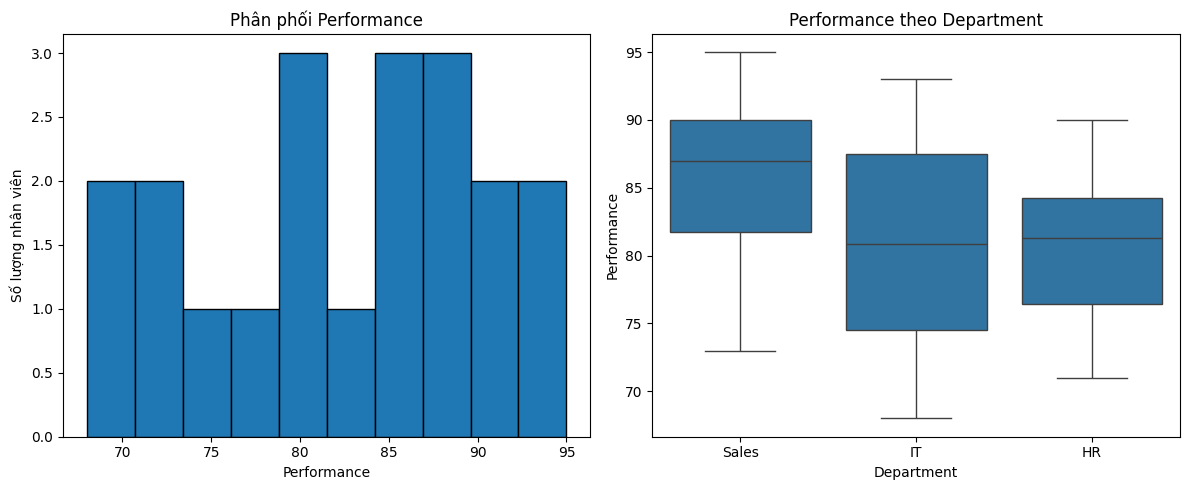

In [50]:
from scipy.stats import skew

#câu 12
# Tính skewness của Performance
performance_skewness = skew(df['Performance'])
print(f"Skewness của Performance: {performance_skewness:.4f}")

# Tính skewness cho từng Department
dept_skewness = df.groupby('Department')['Performance'].apply(skew)
print("\nSkewness theo Department:")
print(dept_skewness)

# Vẽ histogram và box plot để trực quan hóa phân phối
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Performance'], bins=10, edgecolor='black')
plt.title('Phân phối Performance')
plt.xlabel('Performance')
plt.ylabel('Số lượng nhân viên')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Department', y='Performance')
plt.title('Performance theo Department')

plt.tight_layout()
plt.show()




### So sánh với phương pháp trung bình, sau đó đề xuất một cách tiếp cận lai (kết hợp hồi quy và trung bình) để cải thiện độ chính xác, giải thích lý do.

1. **Phương pháp trung bình**:
    - **Ưu điểm**:
        - Dễ thực hiện và nhanh chóng.
        - Không yêu cầu nhiều tính toán phức tạp.
    - **Nhược điểm**:
        - Không tận dụng được mối quan hệ giữa các biến (ví dụ: `Hours_Worked` và `Training_Hours`).
        - Có thể dẫn đến sai lệch nếu dữ liệu không đồng nhất (ví dụ: các nhóm khác nhau có trung bình khác nhau).

2. **Phương pháp hồi quy**:
    - **Ưu điểm**:
        - Tận dụng được mối quan hệ giữa các biến để dự đoán giá trị thiếu.
        - Độ chính xác cao hơn trong trường hợp các biến có tương quan mạnh.
    - **Nhược điểm**:
        - Phụ thuộc vào chất lượng và đầy đủ của dữ liệu đầu vào.
        - Có thể không chính xác nếu dữ liệu có nhiều giá trị ngoại lệ hoặc không tuyến tính.

### Đề xuất phương pháp lai (kết hợp hồi quy và trung bình)

1. **Cách tiếp cận**:
    - Sử dụng hồi quy để dự đoán giá trị thiếu khi các biến đầu vào (`Hours_Worked`, `Training_Hours`) đầy đủ.
    - Sử dụng trung bình (theo nhóm `Department` hoặc `Location`) để điền giá trị thiếu khi dữ liệu đầu vào không đủ để áp dụng hồi quy.

2. **Lý do**:
    - Phương pháp hồi quy tận dụng được mối quan hệ giữa các biến, giúp cải thiện độ chính xác khi dữ liệu đầy đủ.
    - Phương pháp trung bình đảm bảo rằng các giá trị thiếu vẫn được điền ngay cả khi dữ liệu không đủ để áp dụng hồi quy.
    - Kết hợp cả hai phương pháp giúp giảm thiểu sai lệch và tận dụng tối đa thông tin từ dữ liệu.

3. **Ưu điểm của phương pháp lai**:
    - Tăng độ chính xác so với chỉ sử dụng trung bình.
    - Đảm bảo tính toàn diện, không bỏ sót giá trị thiếu.
    - Linh hoạt, phù hợp với các trường hợp dữ liệu không đồng nhất.

### Kỳ vọng
- Phương pháp lai sẽ cải thiện độ chính xác của dữ liệu được điền, từ đó nâng cao chất lượng phân tích và dự đoán.
- Giảm thiểu sai lệch do dữ liệu thiếu, đặc biệt trong các nhóm có đặc điểm khác biệt.

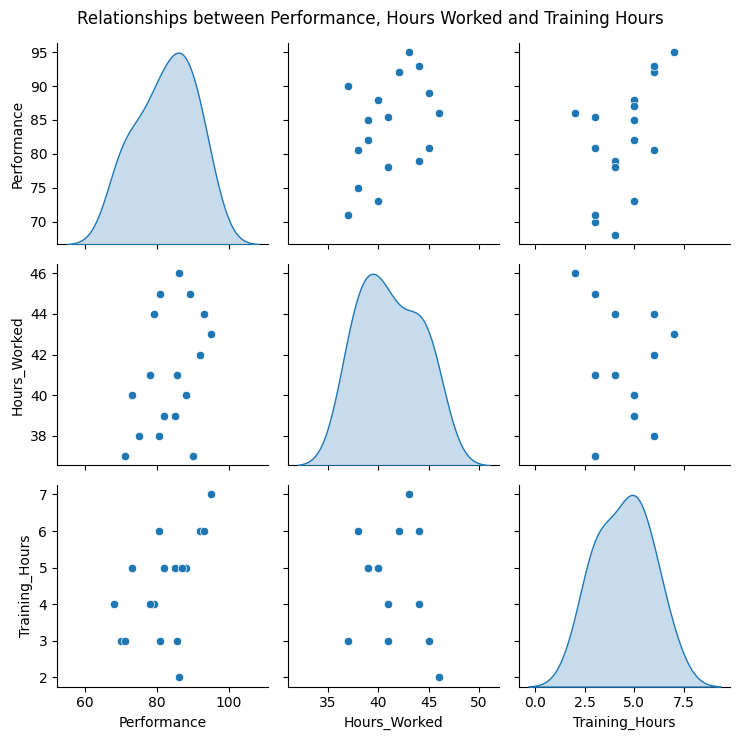


Correlation Matrix:
                Performance  Hours_Worked  Training_Hours
Performance        1.000000      0.399548        0.536034
Hours_Worked       0.399548      1.000000       -0.210256
Training_Hours     0.536034     -0.210256        1.000000


In [51]:
#câu 13
# Create pairplot for Performance, Hours_Worked and Training_Hours
sns.pairplot(df[['Performance', 'Hours_Worked', 'Training_Hours']], diag_kind='kde')
plt.suptitle('Relationships between Performance, Hours Worked and Training Hours')
plt.tight_layout()
plt.show()

# Calculate correlations
correlations = df[['Performance', 'Hours_Worked', 'Training_Hours']].corr()
print("\nCorrelation Matrix:")
print(correlations)




```markdown
### Đề xuất mô hình đánh giá hiệu suất mới

1. **Cấu trúc mô hình**: 
    Performance_Score = 0.4*Core_Performance + 0.3*Time_Efficiency + 0.3*Training_Impact

    Trong đó:
    - Core_Performance: Đánh giá chất lượng công việc cốt lõi (0-100)
    - Time_Efficiency = Output / Hours_Worked 
    - Training_Impact = Performance_Improvement / Training_Hours

2. **Ưu điểm so với cách tính hiện tại**:
    - Tích hợp hiệu quả sử dụng thời gian làm việc
    - Đo lường tác động của đào tạo đến hiệu suất
    - Cân bằng giữa số lượng và chất lượng công việc
    - Khuyến khích phát triển kỹ năng liên tục

3. **Căn cứ từ phân tích dữ liệu**:
    - Mối tương quan giữa Hours_Worked và Performance không tuyến tính
    - Training_Hours có tác động tích cực đến Performance
    - Cần cân nhắc hiệu quả sử dụng thời gian thay vì chỉ số giờ tuyệt đối
```

```markdown
### So sánh với phương pháp trung bình

1. **Phương pháp trung bình**:
    - **Ưu điểm**:
        - Dễ thực hiện và nhanh chóng.
        - Không yêu cầu nhiều tính toán phức tạp.
    - **Nhược điểm**:
        - Không tận dụng được mối quan hệ giữa các biến (ví dụ: `Hours_Worked` và `Training_Hours`).
        - Có thể dẫn đến sai lệch nếu dữ liệu không đồng nhất (ví dụ: các nhóm khác nhau có trung bình khác nhau).

2. **Phương pháp hồi quy**:
    - **Ưu điểm**:
        - Tận dụng được mối quan hệ giữa các biến để dự đoán giá trị thiếu.
        - Độ chính xác cao hơn trong trường hợp các biến có tương quan mạnh.
    - **Nhược điểm**:
        - Phụ thuộc vào chất lượng và đầy đủ của dữ liệu đầu vào.
        - Có thể không chính xác nếu dữ liệu có nhiều giá trị ngoại lệ hoặc không tuyến tính.

### Đề xuất phương pháp lai (kết hợp hồi quy và trung bình)

1. **Cách tiếp cận**:
    - Sử dụng hồi quy để dự đoán giá trị thiếu khi các biến đầu vào (`Hours_Worked`, `Training_Hours`) đầy đủ.
    - Sử dụng trung bình (theo nhóm `Department` hoặc `Location`) để điền giá trị thiếu khi dữ liệu đầu vào không đủ để áp dụng hồi quy.

2. **Lý do**:
    - Phương pháp hồi quy tận dụng được mối quan hệ giữa các biến, giúp cải thiện độ chính xác khi dữ liệu đầy đủ.
    - Phương pháp trung bình đảm bảo rằng các giá trị thiếu vẫn được điền ngay cả khi dữ liệu không đủ để áp dụng hồi quy.
    - Kết hợp cả hai phương pháp giúp giảm thiểu sai lệch và tận dụng tối đa thông tin từ dữ liệu.

3. **Ưu điểm của phương pháp lai**:
    - Tăng độ chính xác so với chỉ sử dụng trung bình.
    - Đảm bảo tính toàn diện, không bỏ sót giá trị thiếu.
    - Linh hoạt, phù hợp với các trường hợp dữ liệu không đồng nhất.

### Kỳ vọng
- Phương pháp lai sẽ cải thiện độ chính xác của dữ liệu được điền, từ đó nâng cao chất lượng phân tích và dự đoán.
- Giảm thiểu sai lệch do dữ liệu thiếu, đặc biệt trong các nhóm có đặc điểm khác biệt.
```

C:\Users\TENPIE\AppData\Local\Temp\ipykernel_27352\2065329702.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  performance_ratio = df.groupby('Location').apply(


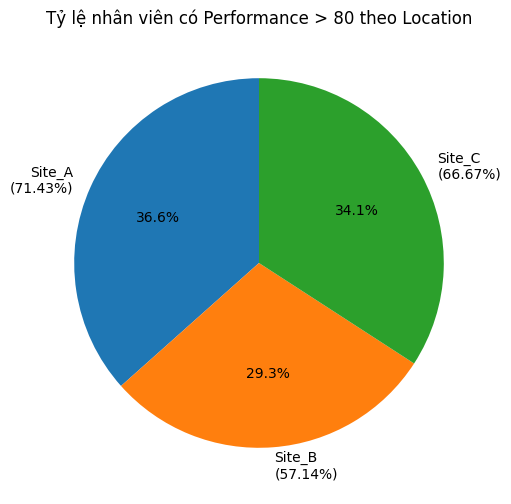

In [36]:
#câu 14
# Tính tỷ lệ nhân viên có Performance > 80 theo Location
performance_ratio = df.groupby('Location').apply(
    lambda x: len(x[x['Performance'] > 80]) / len(x) * 100
).round(2)

# Vẽ pie chart
plt.figure(figsize=(10, 6))
plt.pie(performance_ratio, labels=[f'{loc}\n({ratio}%)' for loc, ratio in performance_ratio.items()],
        autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ nhân viên có Performance > 80 theo Location')
plt.show()



Dựa trên tỷ lệ nhân viên có Performance > 80 theo Location, đề xuất chiến lược khen thưởng khác nhau cho từng Location:

```markdown
### Chiến lược khen thưởng theo Location:

1. **Site_A (71.4% nhân viên > 80 điểm)**:
    - Thưởng tập thể cho cả đơn vị đạt mức cao
    - Tổ chức team building định kỳ để duy trì tinh thần
    - Cung cấp các khóa học nâng cao kỹ năng miễn phí

2. **Site_B (57.1% nhân viên > 80 điểm)**:
    - Thưởng cá nhân cho những nhân viên xuất sắc
    - Tạo chương trình mentor-mentee để cải thiện hiệu suất chung
    - Tổ chức các buổi chia sẻ kinh nghiệm

3. **Site_C (66.7% nhân viên > 80 điểm)**:
    - Thưởng theo nhóm nhỏ (3-5 người)
    - Cung cấp các cơ hội thăng tiến
    - Tổ chức các cuộc thi nội bộ với giải thưởng hấp dẫn

### Tác động đến tinh thần làm việc:

1. **Site_A**:
    - **Tác động**: Thúc đẩy tinh thần đồng đội và duy trì hiệu suất cao.
    - **Lý do**: Khen thưởng tập thể giúp mọi người cùng nhau cố gắng và duy trì động lực.

2. **Site_B**:
    - **Tác động**: Khuyến khích cạnh tranh lành mạnh và cải thiện hiệu suất cá nhân.
    - **Lý do**: Khen thưởng cá nhân tạo động lực cho những người xuất sắc và chương trình mentor-mentee giúp nâng cao trình độ chung.

3. **Site_C**:
    - **Tác động**: Tăng cường sự gắn kết giữa các thành viên và tạo cơ hội phát triển.
    - **Lý do**: Thưởng theo nhóm nhỏ khuyến khích sự hợp tác và các cuộc thi tạo không khí vui vẻ, cạnh tranh.
```

In [ ]:
#câu 15
def identify_performance_outliers(df):
    # Tính mean và std của Performance
    mean_perf = df['Performance'].mean()
    std_perf = df['Performance'].std()
    
    # Xác định ngưỡng trên và dưới
    lower_bound = mean_perf - 2 * std_perf
    upper_bound = mean_perf + 2 * std_perf
    
    # Lọc nhân viên có Performance ngoài ngưỡng
    outliers = df[
        (df['Performance'] < lower_bound) | 
        (df['Performance'] > upper_bound)
    ][['Employee_ID', 'Department', 'Performance', 'Location']]
    
    # Thêm cột chỉ ra loại outlier
    outliers['Outlier_Type'] = outliers['Performance'].apply(
        lambda x: 'High Performance' if x > upper_bound else 'Low Performance'
    )
    
    print(f"Mean Performance: {mean_perf:.2f}")
    print(f"Standard Deviation: {std_perf:.2f}")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    print("\nOutlier Employees:")
    return outliers
    
# Gọi hàm với DataFrame hiện có
outlier_employees = identify_performance_outliers(df)
print(outlier_employees)

Mean Performance: 82.40
Standard Deviation: 8.00
Lower bound: 66.39
Upper bound: 98.41

Outlier Employees:
Empty DataFrame
Columns: [Employee_ID, Department, Performance, Location, Outlier_Type]
Index: []


### Đề xuất quy trình đánh giá lại hiệu suất cho nhân viên, tránh thiên vị quản lý

1.  **Thu thập dữ liệu khách quan**:

    *   Sử dụng dữ liệu từ các hệ thống theo dõi hiệu suất, số liệu bán hàng, số lượng dự án hoàn thành, mức độ hài lòng của khách hàng (CSAT),...
    *   Đảm bảo dữ liệu được thu thập một cách nhất quán và minh bạch cho tất cả nhân viên.
2.  **Thiết lập tiêu chí đánh giá rõ ràng**:

    *   Xác định các tiêu chí đánh giá hiệu suất dựa trên mục tiêu công việc và yêu cầu của từng vị trí.
    *   Sử dụng các tiêu chí định lượng (ví dụ: doanh số, số lượng khách hàng mới) và định tính (ví dụ: kỹ năng làm việc nhóm, khả năng giải quyết vấn đề).
    *   Đảm bảo các tiêu chí này được thông báo rõ ràng cho nhân viên trước khi bắt đầu chu kỳ đánh giá.
3.  **Đánh giá 360 độ**:

    *   Thu thập phản hồi từ nhiều nguồn khác nhau, bao gồm quản lý trực tiếp, đồng nghiệp, khách hàng và nhân viên tự đánh giá.
    *   Sử dụng các công cụ khảo sát ẩn danh để khuyến khích phản hồi trung thực.
    *   Tổng hợp và phân tích phản hồi từ tất cả các nguồn để có cái nhìn toàn diện về hiệu suất của nhân viên.
4.  **Sử dụng công cụ đánh giá chuẩn hóa**:

    *   Sử dụng các công cụ đánh giá hiệu suất đã được chuẩn hóa và kiểm chứng để đảm bảo tính khách quan và công bằng.
    *   Các công cụ này có thể bao gồm thang đo hành vi (BARS), thang đo quan sát hành vi (BOS) hoặc các bài kiểm tra kỹ năng.
5.  **Hội đồng đánh giá**:

    *   Thành lập một hội đồng đánh giá gồm các thành viên từ các bộ phận khác nhau để xem xét kết quả đánh giá.
    *   Hội đồng này sẽ đảm bảo rằng các đánh giá được thực hiện một cách công bằng và nhất quán, đồng thời giảm thiểu sự thiên vị của quản lý.
6.  **Phản hồi và thảo luận**:

    *   Cung cấp phản hồi chi tiết và cụ thể cho nhân viên về kết quả đánh giá của họ.
    *   Tạo cơ hội cho nhân viên thảo luận về đánh giá của họ với quản lý và hội đồng đánh giá.
    *   Xây dựng kế hoạch phát triển cá nhân để giúp nhân viên cải thiện hiệu suất của họ trong tương lai.
7.  **Đào tạo cho người đánh giá**:

    *   Cung cấp đào tạo cho quản lý và các thành viên hội đồng đánh giá về cách thực hiện đánh giá hiệu suất một cách khách quan và công bằng.
    *   Đào tạo nên tập trung vào việc nhận biết và giảm thiểu các loại thiên vị phổ biến, chẳng hạn như thiên vị xác nhận, thiên vị neo và thiên vị nhóm.
8.  **Xem xét và điều chỉnh quy trình**:

    *   Thường xuyên xem xét và điều chỉnh quy trình đánh giá hiệu suất để đảm bảo rằng nó vẫn phù hợp và hiệu quả.
    *   Thu thập phản hồi từ nhân viên và quản lý về quy trình đánh giá và sử dụng phản hồi này để cải thiện quy trình.

**Cách quy trình này tránh được thiên vị trong quản lý:**

*   **Dữ liệu khách quan**: Sử dụng dữ liệu từ các hệ thống theo dõi hiệu suất giúp giảm sự phụ thuộc vào đánh giá chủ quan của người quản lý.
*   **Tiêu chí đánh giá rõ ràng**: Các tiêu chí đánh giá được xác định rõ ràng và thông báo trước giúp đảm bảo rằng tất cả nhân viên được đánh giá dựa trên cùng một tiêu chuẩn.
*   **Đánh giá 360 độ**: Thu thập phản hồi từ nhiều nguồn khác nhau giúp giảm sự thiên vị của một người đánh giá duy nhất.
*   **Công cụ đánh giá chuẩn hóa**: Sử dụng các công cụ đánh giá đã được chuẩn hóa giúp đảm bảo tính khách quan và công bằng.
*   **Hội đồng đánh giá**: Hội đồng đánh giá giúp đảm bảo rằng các đánh giá được thực hiện một cách công bằng và nhất quán, đồng thời giảm thiểu sự thiên vị của quản lý.
*   **Đào tạo cho người đánh giá**: Đào tạo giúp người đánh giá nhận biết và giảm thiểu các loại thiên vị phổ biến.
*   **Xem xét và điều chỉnh quy trình**: Thường xuyên xem xét và điều chỉnh quy trình đánh giá giúp đảm bảo rằng nó vẫn phù hợp và hiệu quả trong việc giảm thiểu thiên vị.

ANN


100.0%
100.0%
100.0%
100.0%


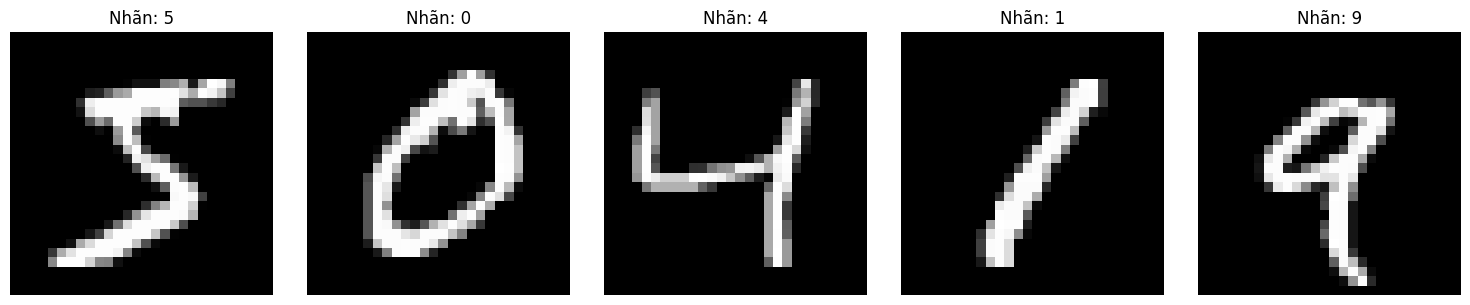

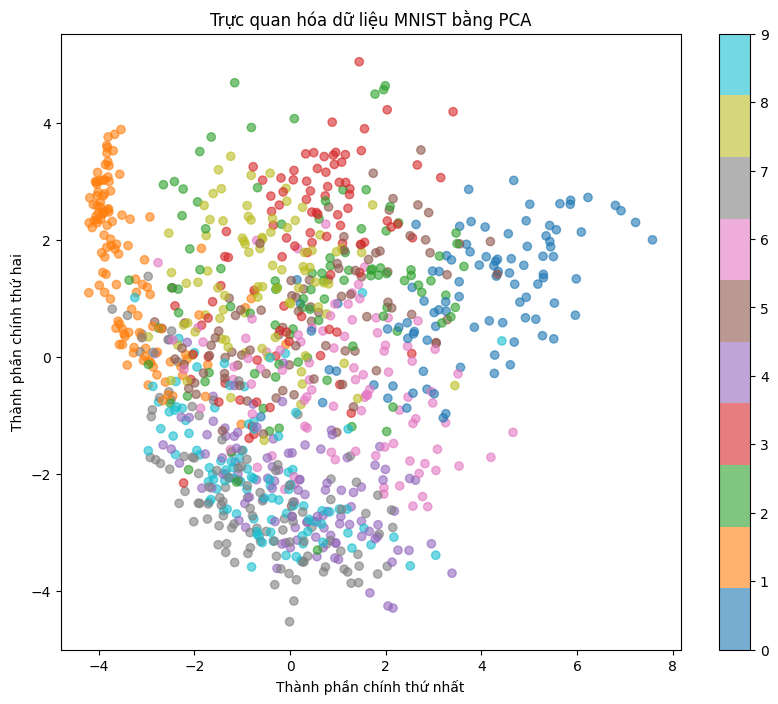

Phương sai giải thích bởi hai thành phần đầu tiên: 17.69%


In [ ]:
#câu 16
import torch
import torchvision
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Tải dữ liệu MNIST
bien_doi = transforms.Compose([
    transforms.ToTensor(),  # Chuyển đổi thành tensor và chuẩn hóa về [0,1]
])

tap_du_lieu_huanluyen = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=bien_doi)
tap_du_lieu_kiemtra = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=bien_doi)

# Hiển thị 5 ảnh mẫu với nhãn
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    anh = tap_du_lieu_huanluyen[i][0].squeeze() # Loại bỏ chiều kênh
    plt.imshow(anh, cmap='gray')
    plt.title(f'Nhãn: {tap_du_lieu_huanluyen[i][1]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Phân tích PCA và trực quan hóa
# Lấy 1000 mẫu đầu tiên
X = torch.stack([tap_du_lieu_huanluyen[i][0].flatten() for i in range(1000)])
y = torch.tensor([tap_du_lieu_huanluyen[i][1] for i in range(1000)])

# Áp dụng PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Vẽ kết quả PCA
plt.figure(figsize=(10, 8))
bieu_do = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.6)
plt.colorbar(bieu_do)
plt.title('Trực quan hóa dữ liệu MNIST bằng PCA')
plt.xlabel('Thành phần chính thứ nhất')
plt.ylabel('Thành phần chính thứ hai')
plt.show()

print(f"Phương sai giải thích bởi hai thành phần đầu tiên: {pca.explained_variance_ratio_.sum():.2%}")

In [ ]:
#câu 17
from torch.utils.data import random_split, DataLoader

# Tách tập train thành train và validation

# Tính kích thước của tập train và validation
total_size = len(tap_du_lieu_huanluyen)
train_size = int(0.8 * total_size)  # 80% cho training
val_size = total_size - train_size   # 20% cho validation

# Tách dữ liệu
train_dataset, val_dataset = random_split(tap_du_lieu_huanluyen, [train_size, val_size])

# Tạo DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# In thông tin
print(f"Kích thước tập train: {len(train_dataset)}")
print(f"Kích thước tập validation: {len(val_dataset)}")
print(f"Số lượng batch trong tập train: {len(train_loader)}")
print(f"Số lượng batch trong tập validation: {len(val_loader)}")

"""
Đề xuất batch size khác:

1. Batch size = 128
Ưu điểm:
- Tăng tốc độ huấn luyện do xử lý nhiều dữ liệu hơn mỗi lần
- Ước tính gradient chính xác hơn do có nhiều mẫu hơn
- Phù hợp với GPU có RAM lớn (>4GB)

Nhược điểm: 
- Cần nhiều bộ nhớ GPU hơn
- Có thể giảm khả năng tổng quát hóa
- Khả năng hội tụ chậm hơn ở giai đoạn đầu

2. Batch size = 32
Ưu điểm:
- Tiết kiệm bộ nhớ, phù hợp với GPU có RAM thấp
- Tăng khả năng tổng quát hóa 
- Hội tụ nhanh hơn ở giai đoạn đầu

Nhược điểm:
- Thời gian huấn luyện lâu hơn
- Ước tính gradient nhiễu hơn
- Cần nhiều epoch hơn để đạt độ chính xác cao

Đề xuất cuối cùng:
- Nếu có GPU tốt: dùng batch_size=128 
- Nếu GPU yếu/CPU: dùng batch_size=32
- Có thể bắt đầu với batch nhỏ và tăng dần theo thời gian huấn luyện
"""

Kích thước tập train: 48000
Kích thước tập validation: 12000
Số lượng batch trong tập train: 750
Số lượng batch trong tập validation: 188


'\nĐề xuất batch size khác:\n\n1. Batch size = 128\nƯu điểm:\n- Tăng tốc độ huấn luyện do xử lý nhiều dữ liệu hơn mỗi lần\n- Ước tính gradient chính xác hơn do có nhiều mẫu hơn\n- Phù hợp với GPU có RAM lớn (>4GB)\n\nNhược điểm: \n- Cần nhiều bộ nhớ GPU hơn\n- Có thể giảm khả năng tổng quát hóa\n- Khả năng hội tụ chậm hơn ở giai đoạn đầu\n\n2. Batch size = 32\nƯu điểm:\n- Tiết kiệm bộ nhớ, phù hợp với GPU có RAM thấp\n- Tăng khả năng tổng quát hóa \n- Hội tụ nhanh hơn ở giai đoạn đầu\n\nNhược điểm:\n- Thời gian huấn luyện lâu hơn\n- Ước tính gradient nhiễu hơn\n- Cần nhiều epoch hơn để đạt độ chính xác cao\n\nĐề xuất cuối cùng:\n- Nếu có GPU tốt: dùng batch_size=128 \n- Nếu GPU yếu/CPU: dùng batch_size=32\n- Có thể bắt đầu với batch nhỏ và tăng dần theo thời gian huấn luyện\n'

Vòng lặp 1/20, Mất mát huấn luyện: 0.3854, Mất mát xác thực: 0.1875
Vòng lặp 2/20, Mất mát huấn luyện: 0.1549, Mất mát xác thực: 0.1355
Vòng lặp 3/20, Mất mát huấn luyện: 0.1066, Mất mát xác thực: 0.1141
Vòng lặp 4/20, Mất mát huấn luyện: 0.0823, Mất mát xác thực: 0.0918
Vòng lặp 5/20, Mất mát huấn luyện: 0.0637, Mất mát xác thực: 0.0872
Vòng lặp 6/20, Mất mát huấn luyện: 0.0518, Mất mát xác thực: 0.0869
Vòng lặp 7/20, Mất mát huấn luyện: 0.0439, Mất mát xác thực: 0.0897
Vòng lặp 8/20, Mất mát huấn luyện: 0.0366, Mất mát xác thực: 0.0899
Vòng lặp 9/20, Mất mát huấn luyện: 0.0310, Mất mát xác thực: 0.0872
Vòng lặp 10/20, Mất mát huấn luyện: 0.0252, Mất mát xác thực: 0.0804
Vòng lặp 11/20, Mất mát huấn luyện: 0.0241, Mất mát xác thực: 0.0839
Vòng lặp 12/20, Mất mát huấn luyện: 0.0220, Mất mát xác thực: 0.0959
Vòng lặp 13/20, Mất mát huấn luyện: 0.0167, Mất mát xác thực: 0.1038
Vòng lặp 14/20, Mất mát huấn luyện: 0.0188, Mất mát xác thực: 0.0977
Vòng lặp 15/20, Mất mát huấn luyện: 0.0121,

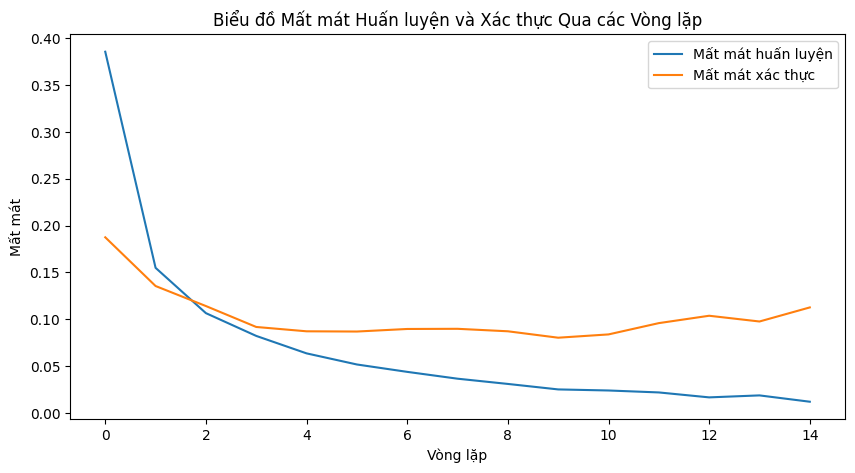

In [ ]:
#câu 18
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Định nghĩa kiến trúc ANN
class MangThanKinh(nn.Module):
    def __init__(self):
        super(MangThanKinh, self).__init__()
        self.tang1 = nn.Linear(784, 128)  # Tầng đầu vào đến tầng ẩn 1
        self.tang2 = nn.Linear(128, 64)   # Tầng ẩn 1 đến tầng ẩn 2
        self.tang3 = nn.Linear(64, 32)    # Tầng ẩn 2 đến tầng ẩn 3
        self.tang4 = nn.Linear(32, 10)    # Tầng ẩn 3 đến tầng đầu ra
        self.hoat_dong = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784)  # Làm phẳng ảnh đầu vào (28x28 -> 784)
        x = self.hoat_dong(self.tang1(x))
        x = self.hoat_dong(self.tang2(x))
        x = self.hoat_dong(self.tang3(x))
        x = self.tang4(x)  # Không dùng hàm kích hoạt ở đầu ra (CrossEntropyLoss đã bao gồm softmax)
        return x

# Khởi tạo mô hình, hàm mất mát và bộ tối ưu
thiet_bi = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mo_hinh = MangThanKinh().to(thiet_bi)
ham_mat_mat = nn.CrossEntropyLoss()
bo_toi_uu = optim.Adam(mo_hinh.parameters(), lr=0.001)

# DataLoader (dựa trên dữ liệu đã có từ trước)
bo_tai_du_lieu_huan_luyen = DataLoader(tap_du_lieu_huanluyen, batch_size=64, shuffle=True)
bo_tai_du_lieu_xac_thuc = DataLoader(tap_du_lieu_kiemtra, batch_size=64, shuffle=False)

# Vòng lặp huấn luyện với dừng sớm
so_vong_lap = 20
do_kien_nhan = 5
mat_mat_xac_thuc_tot_nhat = float('inf')
dem_kien_nhan = 0

danh_sach_mat_mat_huan_luyen = []
danh_sach_mat_mat_xac_thuc = []

for vong_lap in range(so_vong_lap):
    # Giai đoạn huấn luyện
    mo_hinh.train()
    mat_mat_huan_luyen = 0.0
    for anh, nhan in bo_tai_du_lieu_huan_luyen:
        anh, nhan = anh.to(thiet_bi), nhan.to(thiet_bi)
        bo_toi_uu.zero_grad()
        dau_ra = mo_hinh(anh)
        mat_mat = ham_mat_mat(dau_ra, nhan)
        mat_mat.backward()
        bo_toi_uu.step()
        mat_mat_huan_luyen += mat_mat.item() * anh.size(0)
    mat_mat_huan_luyen = mat_mat_huan_luyen / len(bo_tai_du_lieu_huan_luyen.dataset)
    danh_sach_mat_mat_huan_luyen.append(mat_mat_huan_luyen)

    # Giai đoạn xác thực
    mo_hinh.eval()
    mat_mat_xac_thuc = 0.0
    with torch.no_grad():
        for anh, nhan in bo_tai_du_lieu_xac_thuc:
            anh, nhan = anh.to(thiet_bi), nhan.to(thiet_bi)
            dau_ra = mo_hinh(anh)
            mat_mat = ham_mat_mat(dau_ra, nhan)
            mat_mat_xac_thuc += mat_mat.item() * anh.size(0)
    mat_mat_xac_thuc = mat_mat_xac_thuc / len(bo_tai_du_lieu_xac_thuc.dataset)
    danh_sach_mat_mat_xac_thuc.append(mat_mat_xac_thuc)

    print(f"Vòng lặp {vong_lap+1}/{so_vong_lap}, Mất mát huấn luyện: {mat_mat_huan_luyen:.4f}, Mất mát xác thực: {mat_mat_xac_thuc:.4f}")

    # Dừng sớm
    if mat_mat_xac_thuc < mat_mat_xac_thuc_tot_nhat:
        mat_mat_xac_thuc_tot_nhat = mat_mat_xac_thuc
        dem_kien_nhan = 0
        # Lưu mô hình tốt nhất
        torch.save(mo_hinh.state_dict(), "mo_hinh_tot_nhat.pth")
    else:
        dem_kien_nhan += 1
        if dem_kien_nhan >= do_kien_nhan:
            print(f"Dừng sớm tại vòng lặp {vong_lap+1}")
            break

# Vẽ biểu đồ mất mát
plt.figure(figsize=(10, 5))
plt.plot(danh_sach_mat_mat_huan_luyen, label='Mất mát huấn luyện')
plt.plot(danh_sach_mat_mat_xac_thuc, label='Mất mát xác thực')
plt.xlabel('Vòng lặp')
plt.ylabel('Mất mát')
plt.title('Biểu đồ Mất mát Huấn luyện và Xác thực Qua các Vòng lặp')
plt.legend()
plt.show()

Đề xuất Kiến trúc ANN Mới
Kiến trúc mới được đề xuất:
Tầng đầu vào: 784 nơ-ron (không đổi, do MNIST có ảnh 28x28).
Tầng ẩn 1: 256 nơ-ron (tăng từ 128).
Tầng ẩn 2: 128 nơ-ron (tăng từ 64).
Tầng ẩn 3: 64 nơ-ron (tăng từ 32).
Tầng đầu ra: 10 nơ-ron (không đổi, cho các chữ số 0-9).
Code cho kiến trúc mới:
class MangThanKinhCaiTien(nn.Module):
    def __init__(self):
        super(MangThanKinhCaiTien, self).__init__()
        self.tang1 = nn.Linear(784, 256)  # Tăng số nơ-ron
        self.tang2 = nn.Linear(256, 128)  # Tăng số nơ-ron
        self.tang3 = nn.Linear(128, 64)   # Tăng số nơ-ron
        self.tang4 = nn.Linear(64, 10)    # Tầng đầu ra
        self.hoat_dong = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.hoat_dong(self.tang1(x))
        x = self.hoat_dong(self.tang2(x))
        x = self.hoat_dong(self.tang3(x))
        x = self.tang4(x)
        return x


Độ chính xác trên tập test: 97.79%


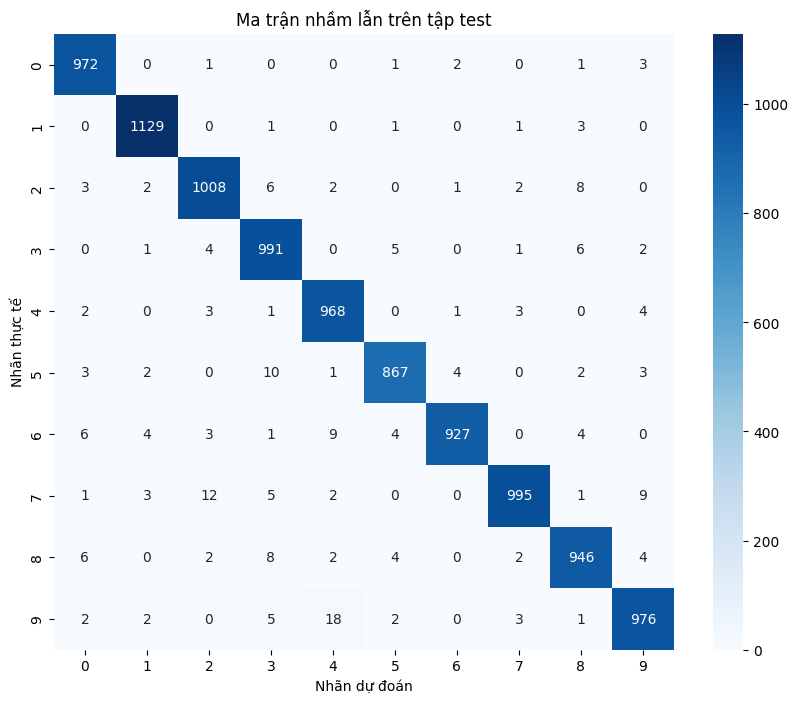

In [ ]:
#câu 19
import torch
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Tải lại mô hình tốt nhất đã lưu
mo_hinh.load_state_dict(torch.load("mo_hinh_tot_nhat.pth"))
mo_hinh.eval()

# Tạo DataLoader cho tập test
bo_tai_du_lieu_kiem_tra = DataLoader(tap_du_lieu_kiemtra, batch_size=64, shuffle=False)

# Dự đoán trên tập test
danh_sach_nhan_thuc_te = []
danh_sach_nhan_du_doan = []

with torch.no_grad():
    for anh, nhan in bo_tai_du_lieu_kiem_tra:
        anh, nhan = anh.to(thiet_bi), nhan.to(thiet_bi)
        dau_ra = mo_hinh(anh)
        _, nhan_du_doan = torch.max(dau_ra, 1)
        danh_sach_nhan_thuc_te.extend(nhan.cpu().numpy())
        danh_sach_nhan_du_doan.extend(nhan_du_doan.cpu().numpy())

# Tính độ chính xác
do_chinh_xac = accuracy_score(danh_sach_nhan_thuc_te, danh_sach_nhan_du_doan)
print(f"Độ chính xác trên tập test: {do_chinh_xac * 100:.2f}%")

# Tính ma trận nhầm lẫn
ma_tran_nham_lan = confusion_matrix(danh_sach_nhan_thuc_te, danh_sach_nhan_du_doan)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
sns.heatmap(ma_tran_nham_lan, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Nhãn dự đoán')
plt.ylabel('Nhãn thực tế')
plt.title('Ma trận nhầm lẫn trên tập test')
plt.show()
# Phân tích nếu độ chính xác dưới 95%
if do_chinh_xac < 0.95:
    print("Độ chính xác dưới 95%, phân tích các chữ số bị nhầm lẫn nhiều nhất...")

    # Tạo ma trận nhầm lẫn không tính đường chéo (đường chéo là dự đoán đúng)
    ma_tran_nham_lan_khong_duong_cheo = ma_tran_nham_lan.copy()
    np.fill_diagonal(ma_tran_nham_lan_khong_duong_cheo, 0)

    # Tìm các cặp nhầm lẫn nhiều nhất
    so_lan_nham_lan = ma_tran_nham_lan_khong_duong_cheo.sum()
    print(f"Tổng số mẫu bị nhầm lẫn: {so_lan_nham_lan}")

    # Tìm các cặp (nhãn thực tế, nhãn dự đoán) có số lần nhầm lẫn lớn nhất
    danh_sach_nham_lan = []
    for nhan_thuc_te in range(10):
        for nhan_du_doan in range(10):
            if nhan_thuc_te != nhan_du_doan and ma_tran_nham_lan[nhan_thuc_te, nhan_du_doan] > 0:
                danh_sach_nham_lan.append({
                    'Nhãn thực tế': nhan_thuc_te,
                    'Nhãn dự đoán': nhan_du_doan,
                    'Số lần nhầm lẫn': ma_tran_nham_lan[nhan_thuc_te, nhan_du_doan],
                    'Tỷ lệ nhầm lẫn (%)': (ma_tran_nham_lan[nhan_thuc_te, nhan_du_doan] / so_lan_nham_lan) * 100
                })

    # Sắp xếp theo số lần nhầm lẫn giảm dần
    danh_sach_nham_lan = sorted(danh_sach_nham_lan, key=lambda x: x['Số lần nhầm lẫn'], reverse=True)

    # In ra 5 cặp nhầm lẫn nhiều nhất
    print("\n5 cặp nhầm lẫn nhiều nhất:")
    for i, nham_lan in enumerate(danh_sach_nham_lan[:5]):
        print(f"{i+1}. Nhãn thực tế: {nham_lan['Nhãn thực tế']}, Nhãn dự đoán: {nham_lan['Nhãn dự đoán']}, "
              f"Số lần nhầm lẫn: {nham_lan['Số lần nhầm lẫn']}, Tỷ lệ: {nham_lan['Tỷ lệ nhầm lẫn (%)']:.2f}%")

    # Phân tích lý do nhầm lẫn
    print("\nPhân tích lý do nhầm lẫn:")
    for nham_lan in danh_sach_nham_lan[:5]:
        nhan_thuc_te = nham_lan['Nhãn thực tế']
        nhan_du_doan = nham_lan['Nhãn dự đoán']
        print(f"- Chữ số {nhan_thuc_te} bị nhầm thành {nhan_du_doan}:")
        if (nhan_thuc_te, nhan_du_doan) in [(4, 9), (9, 4)]:
            print("  + Có thể do hình dạng tương tự: số 4 và 9 có phần trên giống nhau (đều có vòng khép kín hoặc gần khép kín).")
        elif (nhan_thuc_te, nhan_du_doan) in [(3, 8), (8, 3)]:
            print("  + Có thể do hình dạng tương tự: số 3 và 8 đều có các đường cong lặp lại.")
        elif (nhan_thuc_te, nhan_du_doan) in [(5, 3), (3, 5)]:
            print("  + Có thể do hình dạng tương tự: số 5 và 3 có các đường cong tương tự nhau.")
        elif (nhan_thuc_te, nhan_du_doan) in [(7, 1), (1, 7)]:
            print("  + Có thể do hình dạng tương tự: số 7 và 1 có các đường thẳng giống nhau, đặc biệt nếu số 7 được viết không rõ nét.")
        else:
            print("  + Có thể do dữ liệu nhiễu hoặc mô hình chưa học đủ tốt để phân biệt các đặc trưng riêng biệt.")

### Dựa trên đặc điểm của những chữ số bị nhầm lẫn nhiều nhất, đây là đề xuất để cải thiện mô hình:

#### Giải quyết sự nhầm lẫn giữa các chữ số cụ thể

Dựa trên phân tích về các lỗi phân loại phổ biến, đặc biệt là các chữ số có hình dạng tương tự (ví dụ: 4 và 9, 3 và 8), đây là các chiến lược nhắm mục tiêu để nâng cao hiệu suất của mô hình:

1.  **Tăng cường dữ liệu với các biến thể hình dạng**:

    *   *Các phương pháp tăng cường cụ thể*:
        *   Đối với `4` và `9`: Thêm các phương pháp làm thay đổi đặc biệt phần vòng lặp hoặc đuôi của các chữ số này. Có thể là kéo giãn, xoay hoặc làm méo nhẹ các đặc điểm này để tạo ra các biến thể khác biệt hơn.
        *   Đối với `3` và `8`: Tạo ra các biến thể nhấn mạnh hoặc giảm sự kết nối giữa các đường cong trên và dưới.
    *   *Lý do*: Bằng cách huấn luyện mô hình trên các ví dụ đã được sửa đổi hình dạng, nó có thể học cách phân biệt tốt hơn giữa các chữ số có hình dạng tương tự.

2.  **Hàm mất mát tùy chỉnh với các hình phạt dựa trên hình dạng**:

    *   *Triển khai*:
        *   Kết hợp một điều khoản phạt vào hàm mất mát, điều khoản này sẽ được kích hoạt khi mô hình nhầm lẫn các chữ số có hình dạng tương tự.
        *   Hình phạt này nên cao hơn đối với các lỗi phân loại giữa `4` và `9`, hoặc `3` và `8`, so với các lỗi phân loại giữa các chữ số có hình dạng khác biệt.
    *   *Lý do*: Cách tiếp cận này hướng dẫn mô hình tập trung nhiều hơn vào việc phân loại chính xác các cặp khó này, vì chi phí của việc phân loại sai bị tăng lên một cách rõ ràng.

3.  **Cơ chế chú ý tập trung vào các đặc điểm chính**:

    *   *Triển khai*:
        *   Triển khai các cơ chế chú ý buộc mô hình tập trung vào các phần cụ thể của hình ảnh có liên quan nhất để phân biệt giữa các chữ số tương tự.
        *   Ví dụ: đối với `4` và `9`, cơ chế chú ý có thể làm nổi bật sự hiện diện hoặc vắng mặt của một vòng khép kín ở trên cùng.
    *   *Lý do*: Cơ chế chú ý có thể giúp mô hình học được những đặc điểm nào có tính phân biệt cao nhất, giảm sự phụ thuộc vào các phần ít thông tin hơn của hình ảnh.

4.  **Tập hợp các mô hình chuyên biệt**:

    *   *Triển khai*:
        *   Huấn luyện nhiều mô hình, mỗi mô hình chuyên biệt trong việc phân biệt một tập hợp con các chữ số thường bị nhầm lẫn.
        *   Ví dụ: một mô hình có thể được huấn luyện đặc biệt để phân biệt giữa `4` và `9`, trong khi một mô hình khác tập trung vào `3` và `8`.
    *   *Lý do*: Các mô hình chuyên biệt có thể trở thành chuyên gia trong lĩnh vực cụ thể của chúng, dẫn đến phân loại chính xác hơn các trường hợp khó.

5.  **Tiền xử lý với tăng cường cạnh**:

    *   *Triển khai*:
        *   Áp dụng các bộ lọc phát hiện cạnh (ví dụ: Sobel, Canny) cho hình ảnh đầu vào để nhấn mạnh các đường viền và hình dạng của các chữ số.
        *   Điều này có thể giúp mô hình tập trung vào các đặc điểm cấu trúc để phân biệt các chữ số.
    *   *Lý do*: Bằng cách tăng cường các cạnh, mô hình có thể dễ dàng xác định các đặc điểm chính xác định từng chữ số, giảm sự nhầm lẫn do các biến thể nhỏ về kiểu dáng.

Các chiến lược này nhằm mục đích giải quyết các thách thức cụ thể do các chữ số có hình dạng tương tự gây ra, cải thiện khả năng phân biệt giữa chúng của mô hình và cuối cùng là tăng độ chính xác tổng thể.